In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import pandas as pd
import os
import numpy as np
from pathlib import Path

import matplotlib as mpl

mpl.rcParams.update({"figure.facecolor": "white"})

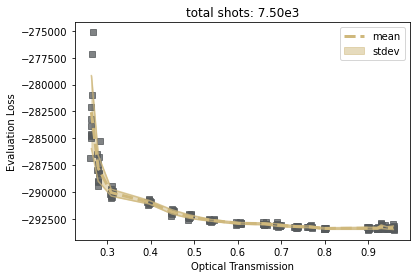

In [23]:
# Plot single-variance curve for deadtime or Poisson model

home = str(Path.home())
load_dir = home + r'\OneDrive - UCB-O365\ARSENL\Manuscripts\Deadtime Model Paper\Data\low_flux_noise_spread\deadtime_nshots_7.50e3'

if load_dir[-22:-14] == 'deadtime':
    color = '#565A5C'
elif load_dir[-21:-14] == 'poisson':
    color = '#000000'
else:
    print('Check naming for file...')

fig = plt.figure()
ax = fig.add_subplot(111)

files = os.listdir(load_dir)
eval_loss_dtime_spread = []
num_eval = len(pd.read_csv(load_dir + r'/' + files[0])['Evaluation Loss'].dropna())
percent_active_tot = np.zeros([len(files), num_eval])
for i in range(len(files)):
    df_dtime = pd.read_csv(load_dir + r'/' + files[i])
    eval_loss_dtime = df_dtime['Evaluation Loss'].dropna()
    percent_active = df_dtime['Average %-age where Detector was Active'].dropna()
    optimal_C = df_dtime['Optimal Scaling Factor'].dropna()

    OD = df_dtime['OD'].dropna()
    transmit_factor = 10**(-OD)
    atten_factor = 1-transmit_factor

    skip_num = 0
#     ax.plot(transmit_factor[skip_num:-1], eval_loss_dtime[skip_num:], 's', color=color, alpha=0.75)
    ax.plot(percent_active[skip_num:], eval_loss_dtime[skip_num:], 's', color=color, alpha=0.75)
    ax.set_xlabel('Optical Transmission')
    ax.set_ylabel('Evaluation Loss')
    
    eval_loss_dtime_spread.append(eval_loss_dtime)
    percent_active_tot[i, :] = percent_active.to_numpy()
    
percent_active_avg = np.mean(percent_active_tot, axis=0)
    
min_eval = np.min(eval_loss_dtime_spread, axis=0)
max_eval = np.max(eval_loss_dtime_spread, axis=0)
mean_eval = np.mean(eval_loss_dtime_spread, axis=0)

stdev_eval = np.std(eval_loss_dtime_spread, axis=0)

# ax.plot(transmit_factor[skip_num:-1], mean_eval[skip_num:], '--', linewidth='3', label='mean', color='#CFB87C')
# ax.plot(transmit_factor[skip_num:-1], mean_eval[skip_num:]+stdev_eval[skip_num:], color='#CFB87C', alpha=0.75)
# ax.plot(transmit_factor[skip_num:-1], mean_eval[skip_num:]-stdev_eval[skip_num:], color='#CFB87C', alpha=0.75)
ax.plot(percent_active_avg[skip_num:], mean_eval[skip_num:], '--', linewidth='3', label='mean', color='#CFB87C')
ax.plot(percent_active_avg[skip_num:], mean_eval[skip_num:]+stdev_eval[skip_num:], color='#CFB87C', alpha=0.75)
ax.plot(percent_active_avg[skip_num:], mean_eval[skip_num:]-stdev_eval[skip_num:], color='#CFB87C', alpha=0.75)
ax.fill_between(percent_active_avg[skip_num:], mean_eval[skip_num:]-stdev_eval[skip_num:], mean_eval[skip_num:]+stdev_eval[skip_num:], color='#CFB87C', alpha=0.5, label='stdev')
ax.set_title('total shots: {}'.format(load_dir[-6:]))
plt.legend()
# plt.xscale('log')
plt.show()


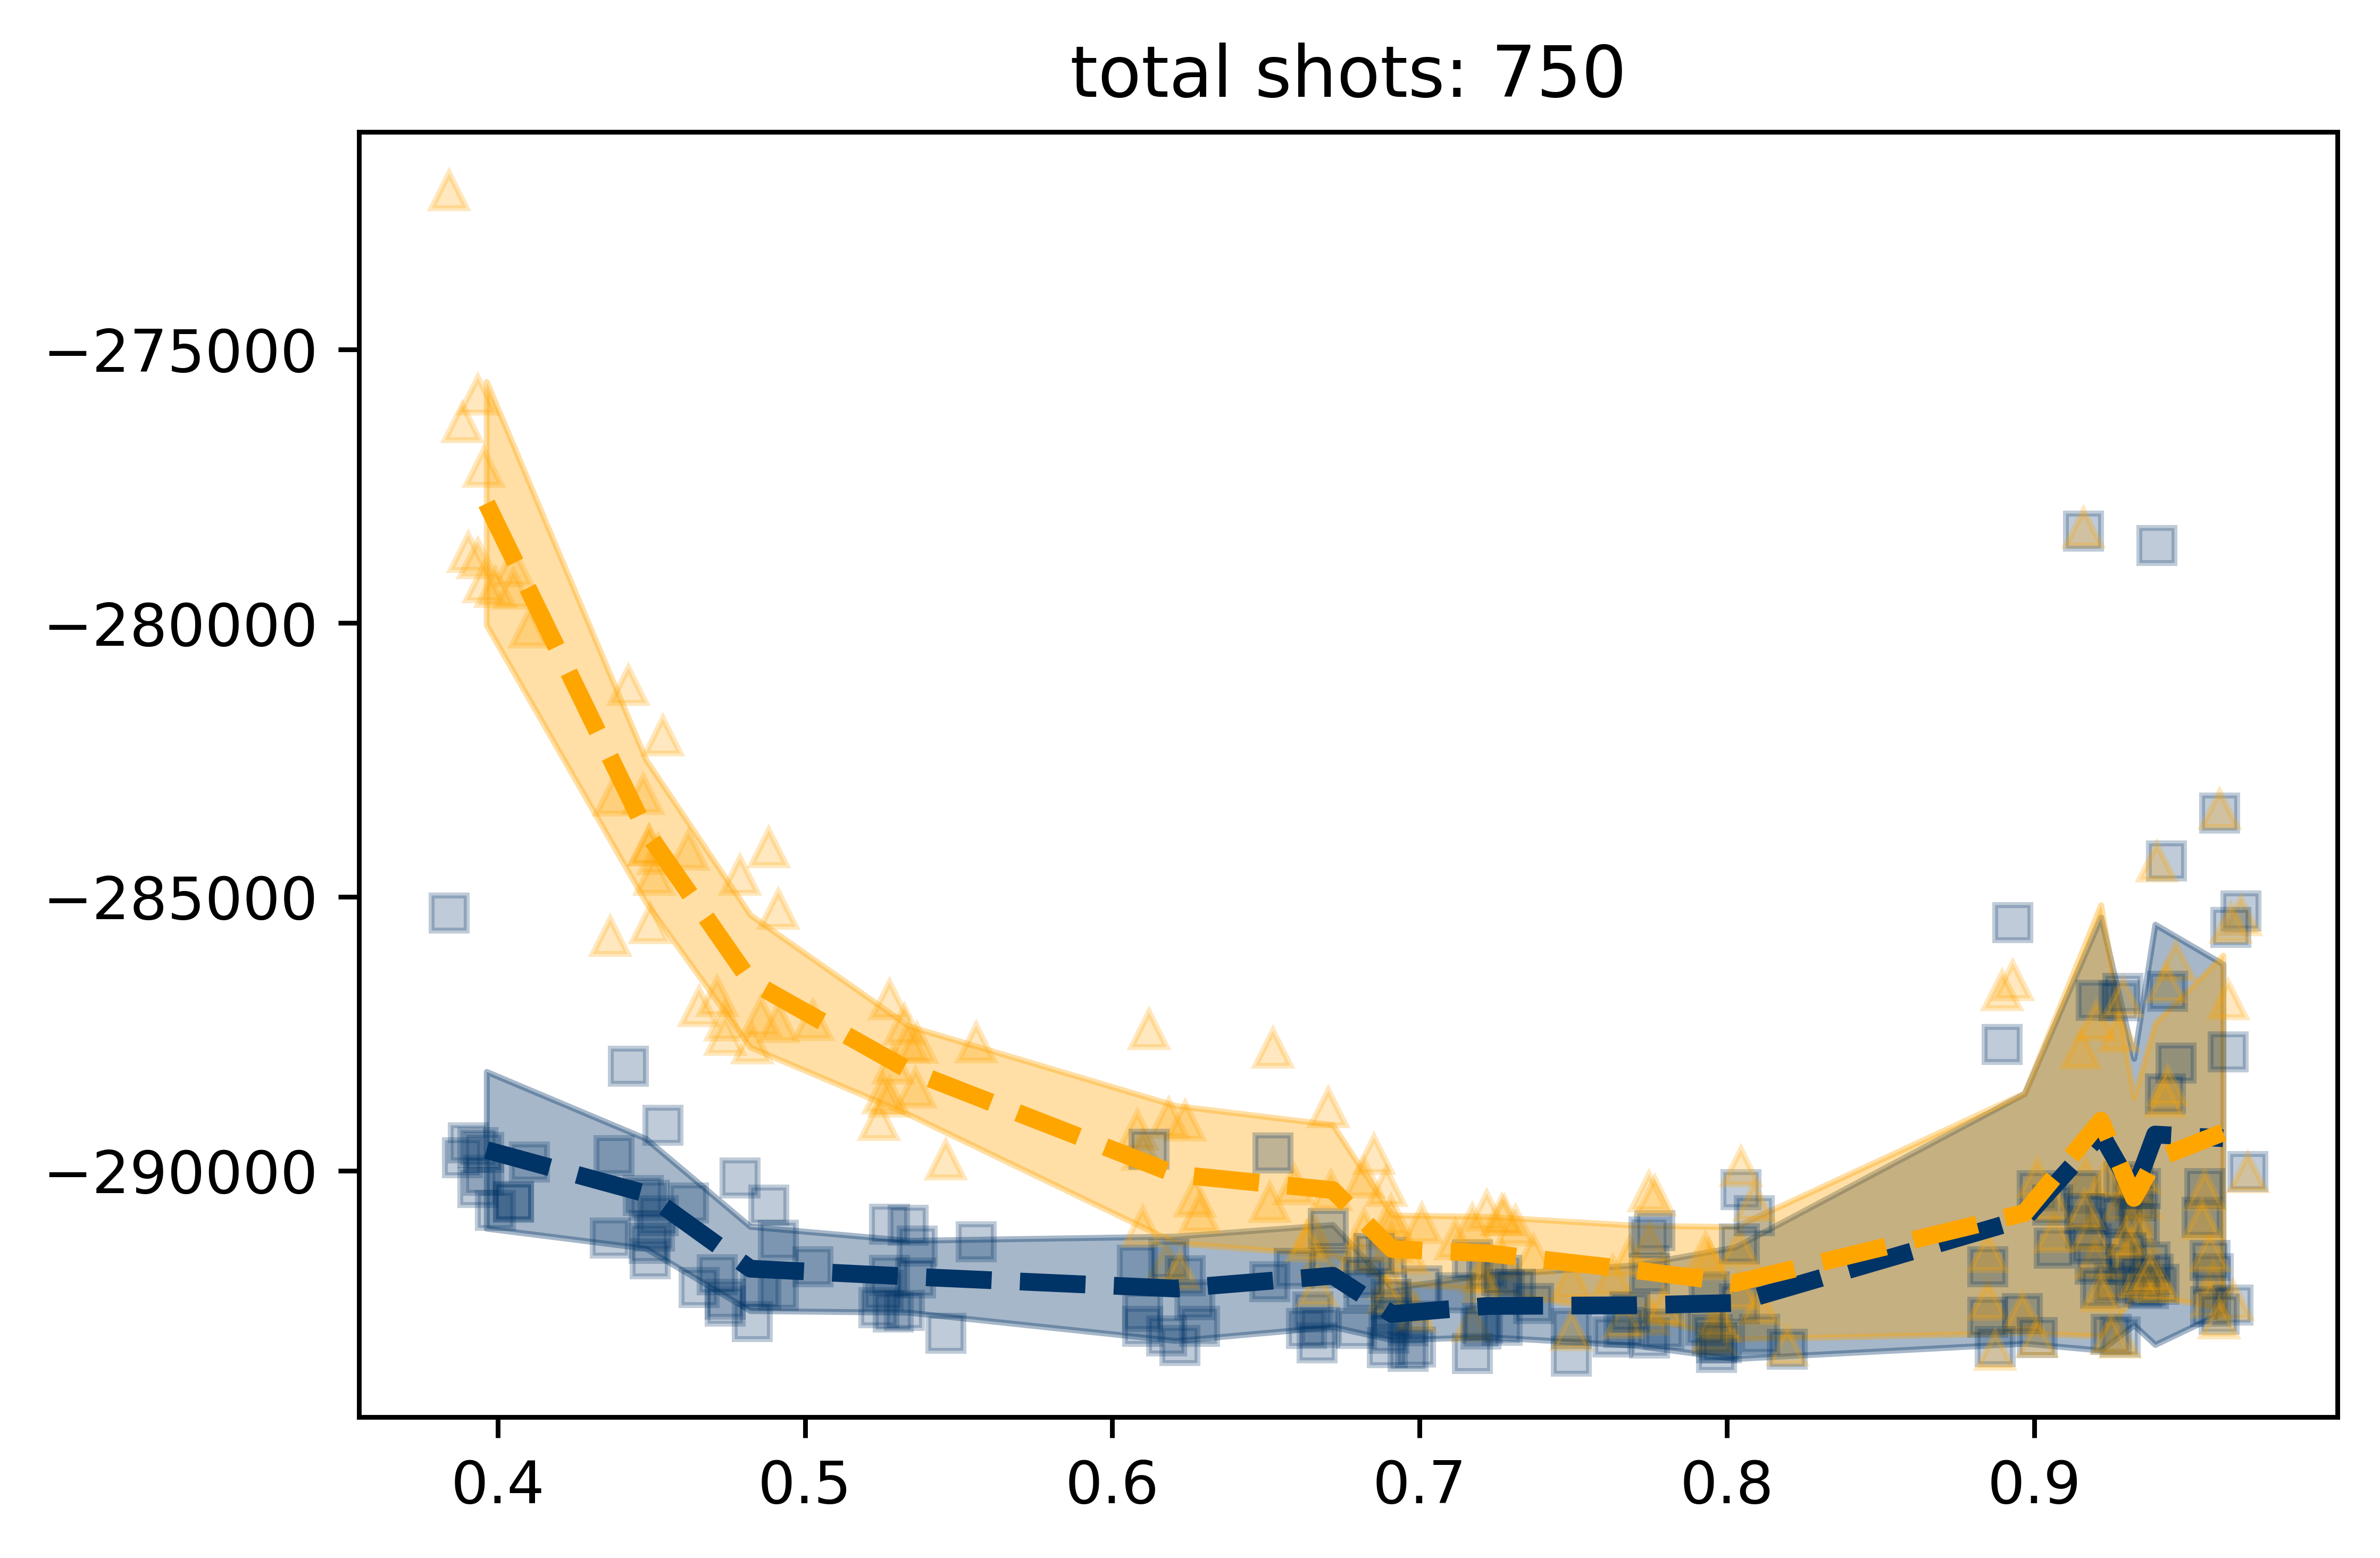

In [50]:
# Plot variances overlain (deadtime and Poisson models)

load_dir_dtime = home + r'\OneDrive - UCB-O365\ARSENL\Manuscripts\Deadtime Model Paper\Data\low_flux_noise_spread\deadtime_nshots_7.50e2'
load_dir_pois = home + r'\OneDrive - UCB-O365\ARSENL\Manuscripts\Deadtime Model Paper\Data\low_flux_noise_spread\poisson_nshots_7.50e2'

fig = plt.figure(dpi=800)
ax = fig.add_subplot(111)

files_dtime = os.listdir(load_dir_dtime)
files_pois = os.listdir(load_dir_pois)
num_eval = len(pd.read_csv(load_dir_dtime + r'/' + files_dtime[0])['Evaluation Loss'].dropna())
percent_active_tot = np.zeros([len(files_dtime), num_eval])
eval_loss_dtime_spread = []
eval_loss_pois_spread = []
for i in range(len(files_dtime)):
    df_dtime = pd.read_csv(load_dir_dtime + r'/' + files_dtime[i])
    df_pois = pd.read_csv(load_dir_pois + r'/' + files_pois[i])
    eval_loss_dtime = df_dtime['Evaluation Loss'].dropna()
    eval_loss_pois = df_pois['Evaluation Loss'].dropna()
    percent_active = df_dtime['Average %-age where Detector was Active'].dropna()
    optimal_C = df_dtime['Optimal Scaling Factor'].dropna()

    OD = df_dtime['OD'].dropna()
    transmit_factor = 10**(-OD)
    atten_factor = 1-transmit_factor

    skip_num = 3
#     ax.plot(transmit_factor[skip_num:-1], eval_loss_dtime[skip_num:], 's', color='#003366', alpha=0.25)
#     ax.plot(transmit_factor[skip_num:-1], eval_loss_pois[skip_num:], '^', color='orange', alpha=0.25)
    ax.plot(percent_active[skip_num:], eval_loss_dtime[skip_num:], 's', color='#003366', alpha=0.25)
    ax.plot(percent_active[skip_num:], eval_loss_pois[skip_num:], '^', color='orange', alpha=0.25)
    
    eval_loss_dtime_spread.append(eval_loss_dtime)
    eval_loss_pois_spread.append(eval_loss_pois)
    
    percent_active_tot[i, :] = percent_active.to_numpy()
    
percent_active_avg = np.mean(percent_active_tot, axis=0)

min_eval_dtime = np.min(eval_loss_dtime_spread, axis=0)
max_eval_dtime = np.max(eval_loss_dtime_spread, axis=0)
mean_eval_dtime = np.mean(eval_loss_dtime_spread, axis=0)
stdev_eval_dtime = np.std(eval_loss_dtime_spread, axis=0)
min_eval_pois = np.min(eval_loss_pois_spread, axis=0)
max_eval_pois = np.max(eval_loss_pois_spread, axis=0)
mean_eval_pois = np.mean(eval_loss_pois_spread, axis=0)
stdev_eval_pois = np.std(eval_loss_pois_spread, axis=0)

# ax.plot(transmit_factor[skip_num:-1], mean_eval_dtime[skip_num:], '--', linewidth='3', label='Deadtime Fit mean', color='#003366')
# ax.plot(transmit_factor[skip_num:-1], mean_eval_pois[skip_num:], '--', linewidth='3', label='Poisson Fit mean', color='orange')
# ax.fill_between(transmit_factor[skip_num:-1], mean_eval_dtime[skip_num:]-stdev_eval_dtime[skip_num:], mean_eval_dtime[skip_num:]+stdev_eval_dtime[skip_num:], color='#003366', alpha=0.35, label='Deadtime $\pm\sigma$')
# ax.fill_between(transmit_factor[skip_num:-1], mean_eval_pois[skip_num:]-stdev_eval_pois[skip_num:], mean_eval_pois[skip_num:]+stdev_eval_pois[skip_num:], color='orange', alpha=0.35, label='Poisson $\pm\sigma$')
ax.plot(percent_active_avg[skip_num:], mean_eval_dtime[skip_num:], '--', linewidth='3', label='Deadtime Fit mean', color='#003366')
ax.plot(percent_active_avg[skip_num:], mean_eval_pois[skip_num:], '--', linewidth='3', label='Poisson Fit mean', color='orange')
ax.fill_between(percent_active_avg[skip_num:], mean_eval_dtime[skip_num:]-stdev_eval_dtime[skip_num:], mean_eval_dtime[skip_num:]+stdev_eval_dtime[skip_num:], color='#003366', alpha=0.35, label='Deadtime $\pm\sigma$')
ax.fill_between(percent_active_avg[skip_num:], mean_eval_pois[skip_num:]-stdev_eval_pois[skip_num:], mean_eval_pois[skip_num:]+stdev_eval_pois[skip_num:], color='orange', alpha=0.35, label='Poisson $\pm\sigma$')
ax.set_title('total shots: {:.0f}'.format(float(load_dir_pois[-6:])))
# ax.set_xlabel('Active Fraction')
# ax.set_ylabel('Evaluation Loss')
# plt.legend()
# plt.xscale('log')
plt.show()


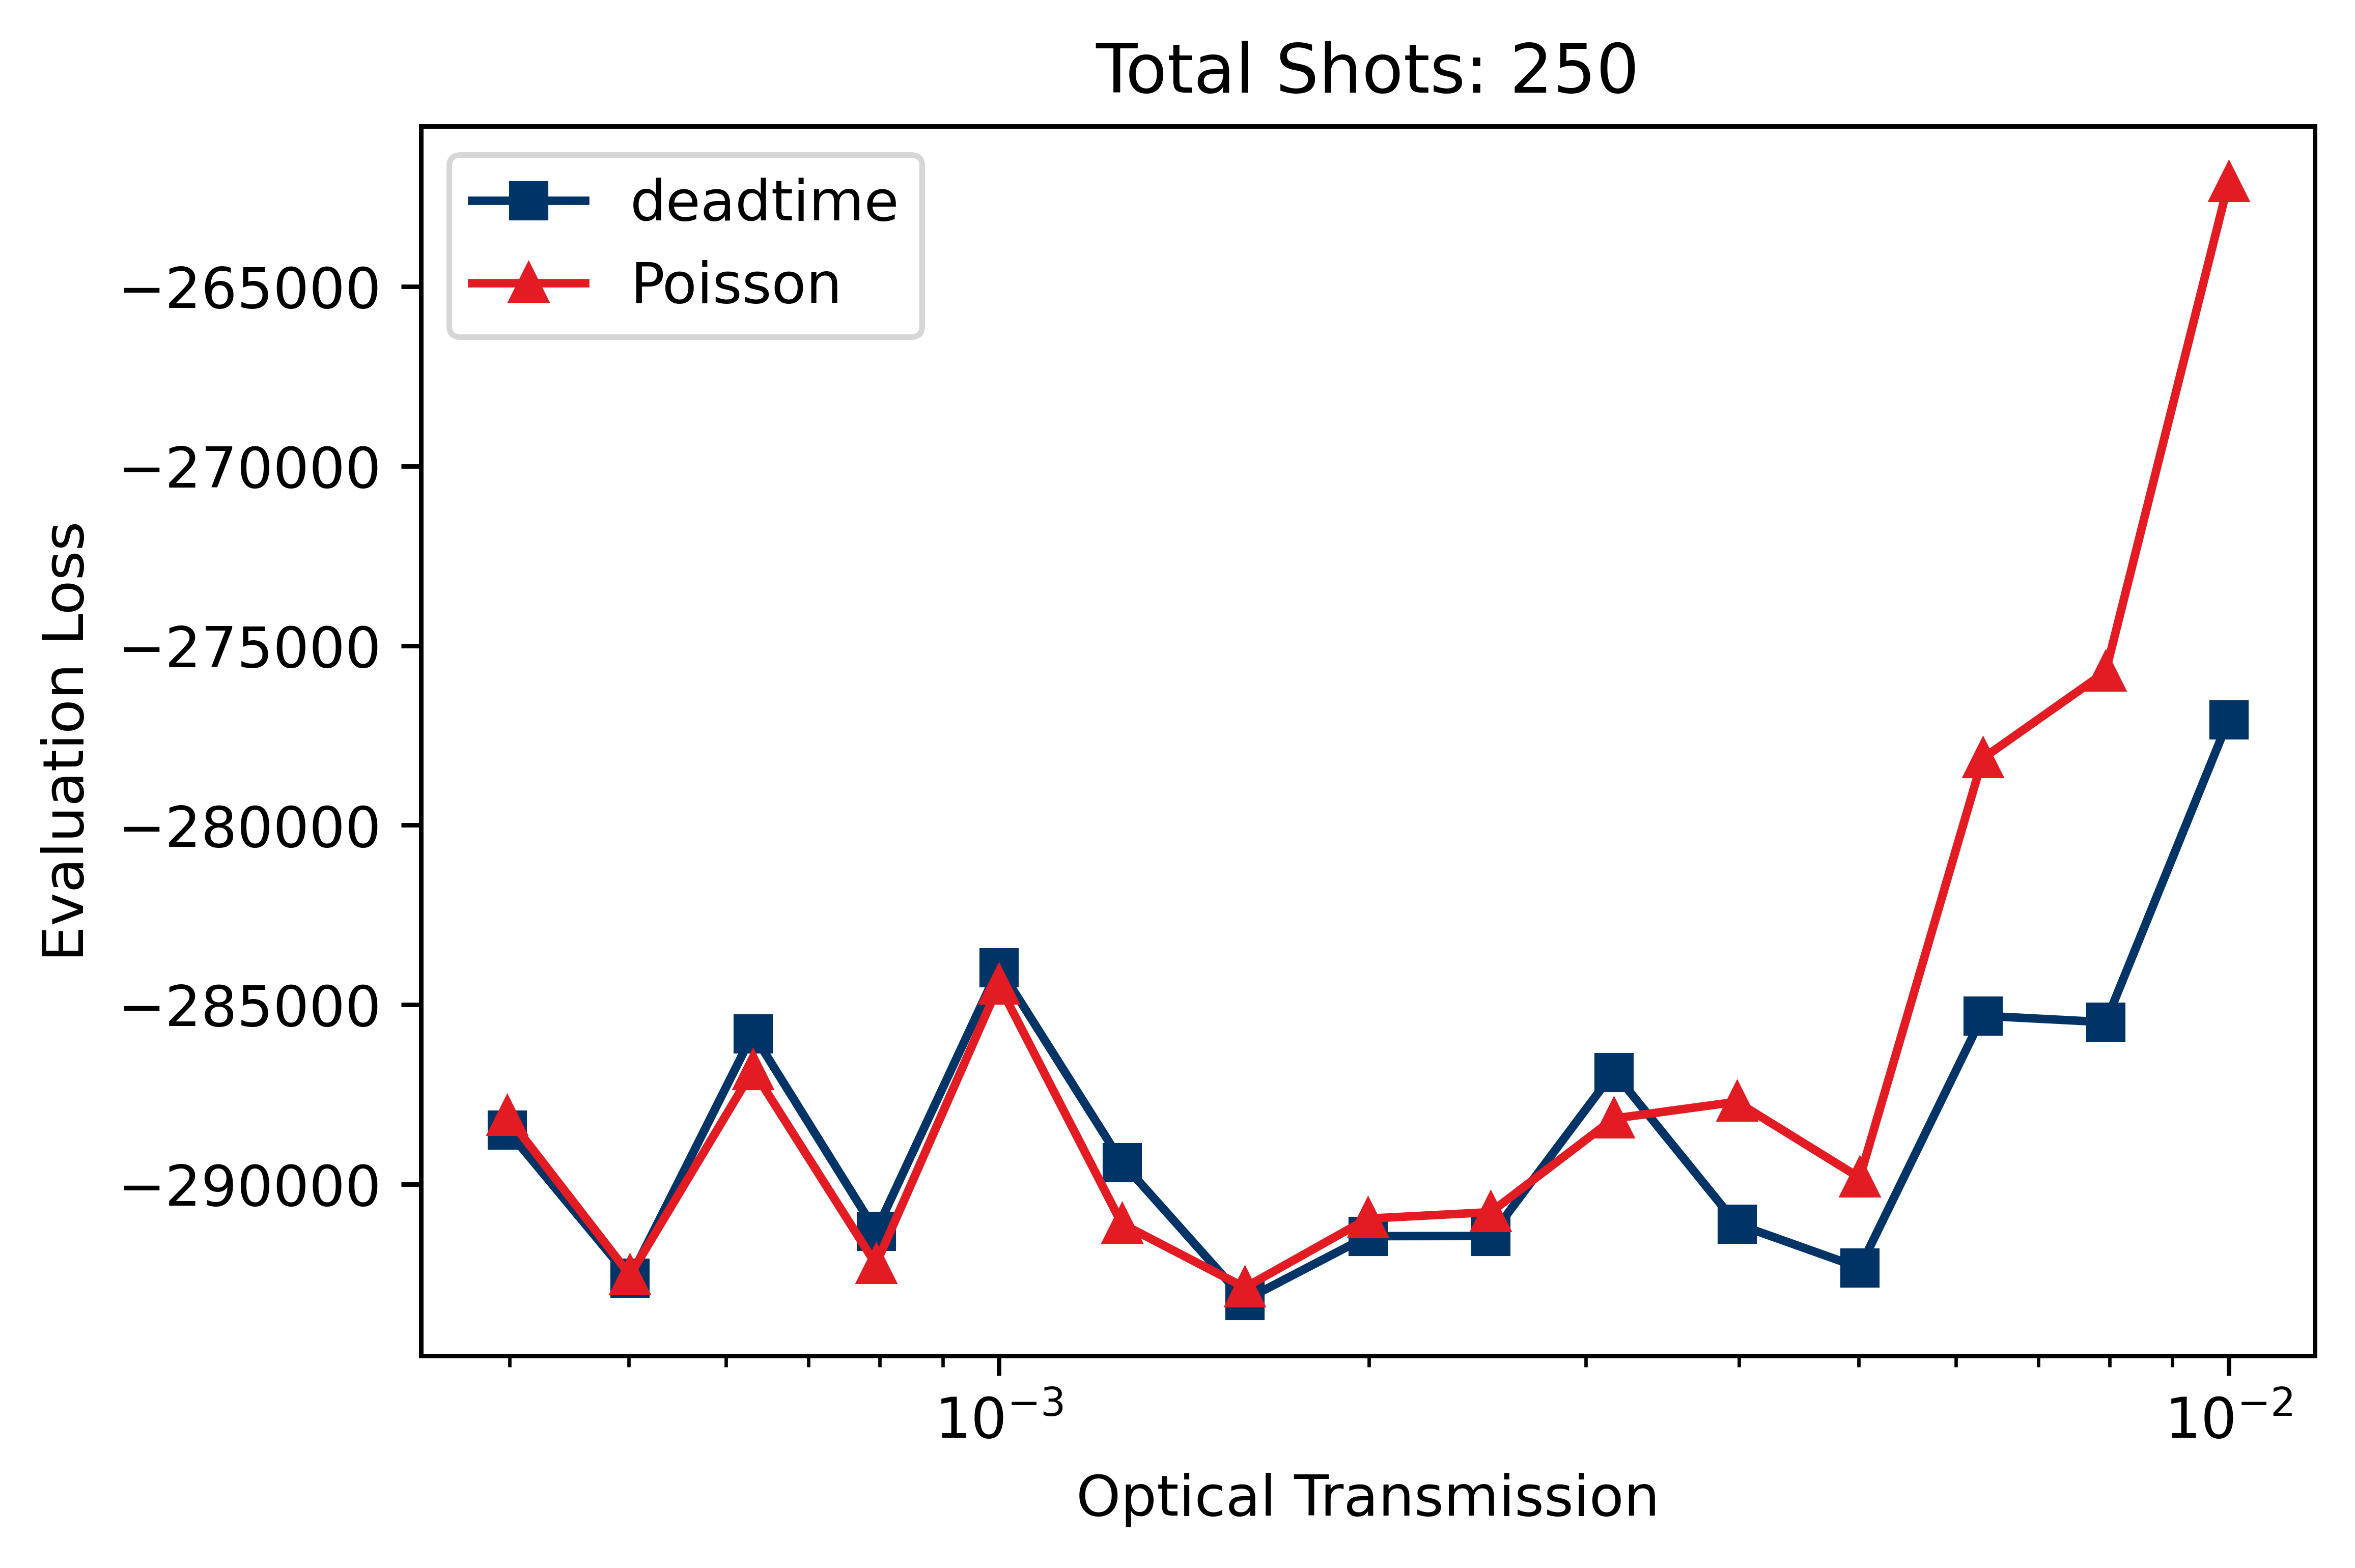

In [32]:
# Plot single eval loss curve

# Plot variances overlain (deadtime and Poisson models)

load_dir_dtime = home + r'\OneDrive - UCB-O365\ARSENL\Manuscripts\Deadtime Model Paper\Data\low_flux_noise_spread\deadtime_nshots_2.50e2'
load_dir_pois = home + r'\OneDrive - UCB-O365\ARSENL\Manuscripts\Deadtime Model Paper\Data\low_flux_noise_spread\poisson_nshots_2.50e2'

fig = plt.figure(dpi=800)
ax = fig.add_subplot(111)

files_dtime = os.listdir(load_dir_dtime)
files_pois = os.listdir(load_dir_pois)
eval_loss_dtime_spread = []
eval_loss_pois_spread = []
for i in range(1):
    df_dtime = pd.read_csv(load_dir_dtime + r'/' + files_dtime[i])
    df_pois = pd.read_csv(load_dir_pois + r'/' + files_pois[i])
    eval_loss_dtime = df_dtime['Evaluation Loss'].dropna()
    eval_loss_pois = df_pois['Evaluation Loss'].dropna()
    percent_active = df_dtime['Average %-age where Detector was Active'].dropna()
    optimal_C = df_dtime['Optimal Scaling Factor'].dropna()

    OD = df_dtime['OD'].dropna()
    transmit_factor = 10**(-OD)
    atten_factor = 1-transmit_factor

    skip_num = 3
    ax.plot(transmit_factor[skip_num:-1], eval_loss_dtime[skip_num:], 's-', color='#003366', label='deadtime')
    ax.plot(transmit_factor[skip_num:-1], eval_loss_pois[skip_num:], '^-', color='#E31B23', label='Poisson')
    ax.set_xlabel('Optical Transmission')
    ax.set_ylabel('Evaluation Loss')
    
    eval_loss_dtime_spread.append(eval_loss_dtime)
    eval_loss_pois_spread.append(eval_loss_pois)

# ax.set_title('total shots: {}'.format(load_dir_pois[-6:]))
ax.set_title('Total Shots: 250')
plt.legend()
plt.xscale('log')
plt.show()


In [9]:
skip_num = 3
load_dir = home + r'\OneDrive - UCB-O365\ARSENL\Experiments\SPCM\evaluation_loss\low_flux_noise_spread'
dirs = os.listdir(load_dir)
files = os.listdir(load_dir + r'/' + dirs[0])
df = pd.read_csv(load_dir + r'/' + dirs[0] + r'/' + files[0])
num_OD = len(df['Evaluation Loss'].dropna()[skip_num:])

stdev_eval_tot = np.zeros([len(dirs), num_OD])
mean_eval_tot = np.zeros([len(dirs), num_OD])
num_shots_tot = np.zeros(len(dirs))
for j in range(len(dirs)):
    files = os.listdir(load_dir + r'/' + dirs[j])
    eval_loss_spread = []
    for i in range(len(files)):
        df = pd.read_csv(load_dir + r'/' + dirs[j] + r'/' + files[i])
        eval_loss = df['Evaluation Loss'].dropna()
        percent_active = df['Average %-age where Detector was Active'].dropna()
        optimal_C = df['Optimal Scaling Factor'].dropna()

        OD = df['OD'].dropna()
        transmit_factor = 10**(-OD)
        atten_factor = 1-transmit_factor

        eval_loss_spread.append(eval_loss[skip_num:])

    num_shots_tot[j] = float(dirs[j][-6:])
    stdev_eval = np.std(eval_loss_spread, axis=0)
    mean_eval = np.mean(eval_loss_spread, axis=0)
    stdev_eval_tot[j, :] = stdev_eval
    mean_eval_tot[j, :] = mean_eval
       
num_shots_tot = num_shots_tot[:int(len(num_shots_tot)/2)]

In [24]:
reorder = np.argsort(num_shots_tot).astype(int)

num_shots = np.array(num_shots_tot)[reorder]
# First half of fits is from Poisson fit, second half is from deadtime fit
stdev_eval_dtime = np.array(stdev_eval_tot[:int(len(stdev_eval_tot[:, 0])/2), :])[reorder]
stdev_eval_pois = np.array(stdev_eval_tot[int(len(stdev_eval_tot[:, 0])/2):, :])[reorder]
mean_eval_dtime = np.array(mean_eval_tot[:int(len(mean_eval_tot[:, 0])/2), :])[reorder]
mean_eval_pois = np.array(mean_eval_tot[int(len(mean_eval_tot[:, 0])/2):, :])[reorder]

In [25]:
thresh = -29.2e4
rows_dtime, cols_dtime = np.where(mean_eval_dtime <= thresh)
rows_pois, cols_pois = np.where(mean_eval_pois <= thresh)

accept_dtime = mean_eval_dtime[rows_dtime, cols_dtime]
accept_pois = mean_eval_pois[rows_pois, cols_pois]
calc_num_shots = np.append(num_shots, num_shots[-1]*1.5)
lens_log_num_shots = np.diff(np.log10(calc_num_shots))  # [log10 shots]
lens_log_t_factor = np.diff(np.log10(transmit_factor[skip_num:-1][::-1]))[0]  # [transmission]

eval_area_dtime = np.sum(lens_log_num_shots[rows_dtime]*lens_log_t_factor)  # [log10 shots * transmission]
eval_area_pois = np.sum(lens_log_num_shots[rows_pois]*lens_log_t_factor)  # [log10 shots * transmission]

tot_area = np.sum(lens_log_num_shots * lens_log_t_factor*len(transmit_factor[skip_num:-1]))

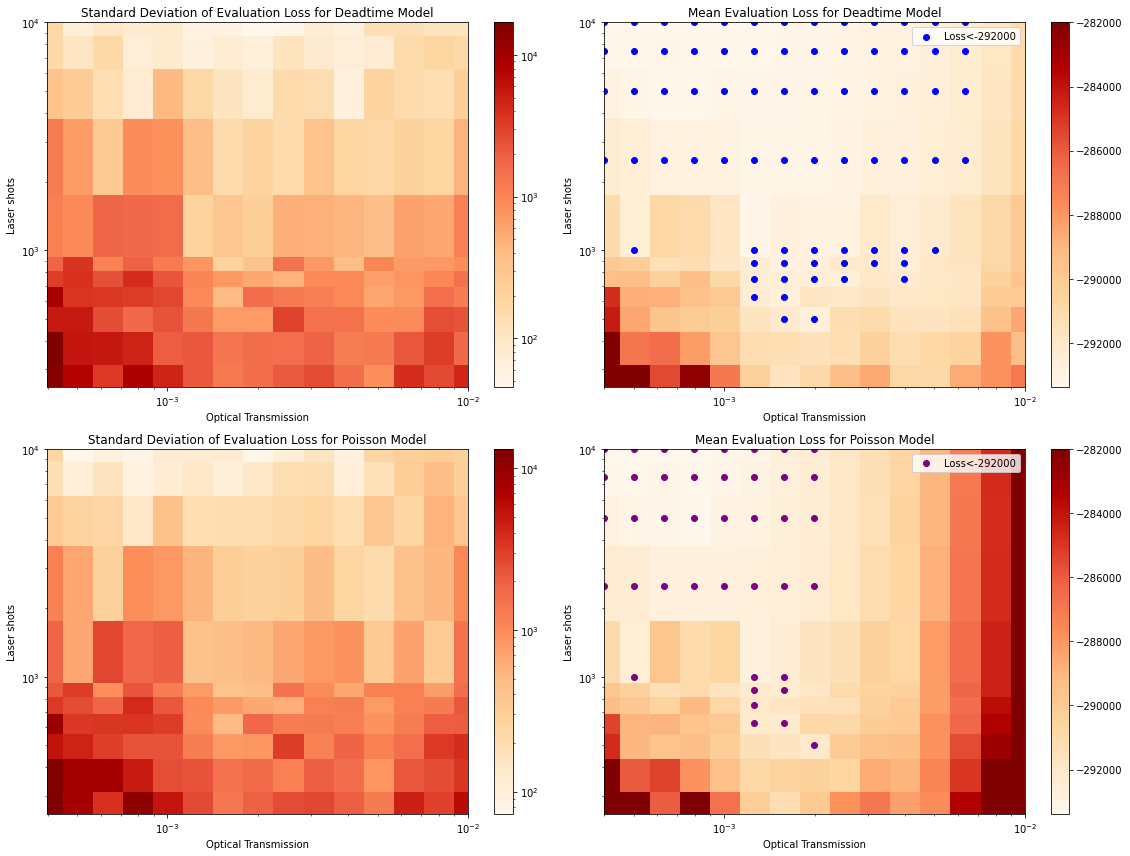

Area Fraction That Subceeds Threshold: Loss<-292000
Deadtime: 0.5374
Poisson: 0.2946


In [26]:
from matplotlib.colors import LogNorm

show_thresh = True

corners = [transmit_factor[skip_num:-1].min(), transmit_factor[skip_num:-1].max(), min(num_shots), max(num_shots)]

fig = plt.figure(figsize=(16,12))
ax1 = fig.add_subplot(221)
# c = ax1.pcolormesh(transmit_factor[skip_num:-1], num_shots, stdev_eval_dtime, cmap='OrRd', vmin=stdev_eval_dtime.min(), vmax=stdev_eval_dtime.max())
c = ax1.pcolormesh(transmit_factor[skip_num:-1], num_shots, stdev_eval_dtime, cmap='OrRd', norm=LogNorm())
ax1.axis(corners)
ax1.set_ylabel('Laser shots')
ax1.set_xlabel('Optical Transmission')
ax1.set_title('Standard Deviation of Evaluation Loss for Deadtime Model')
ax1.set_yscale('log')
ax1.set_xscale('log')
fig.colorbar(c, ax=ax1)

ax2 = fig.add_subplot(223)
# c = ax2.pcolormesh(transmit_factor[skip_num:-1], num_shots, stdev_eval_pois, cmap='OrRd', vmin=stdev_eval_pois.min(), vmax=stdev_eval_pois.max())
c = ax2.pcolormesh(transmit_factor[skip_num:-1], num_shots, stdev_eval_pois, cmap='OrRd', norm=LogNorm())
ax2.axis(corners)
ax2.set_ylabel('Laser shots')
ax2.set_xlabel('Optical Transmission')
ax2.set_title('Standard Deviation of Evaluation Loss for Poisson Model')
ax2.set_yscale('log')
ax2.set_xscale('log')
fig.colorbar(c, ax=ax2)

vmin = mean_eval_pois.min()
# vmax = mean_eval_pois.max()
# vmin = -29e4
vmax = -28.2e4

ax3 = fig.add_subplot(222)
c = ax3.pcolormesh(transmit_factor[skip_num:-1], num_shots, mean_eval_dtime, cmap='OrRd', vmin=vmin, vmax=vmax)
s = ax3.scatter(transmit_factor[skip_num:-1][cols_dtime+skip_num], num_shots[rows_dtime], color='blue')
if show_thresh:
    s.set_label('Loss<{:.0f}'.format(thresh))
    ax3.legend()
ax3.axis(corners)
ax3.set_ylabel('Laser shots')
ax3.set_xlabel('Optical Transmission')
ax3.set_title('Mean Evaluation Loss for Deadtime Model')
ax3.set_yscale('log')
ax3.set_xscale('log')
fig.colorbar(c, ax=ax3)

ax4 = fig.add_subplot(224)
c = ax4.pcolormesh(transmit_factor[skip_num:-1], num_shots, mean_eval_pois, cmap='OrRd', vmin=vmin, vmax=vmax)
s = ax4.scatter(transmit_factor[skip_num:-1][cols_pois+skip_num], num_shots[rows_pois], color='purple')
if show_thresh:
    s.set_label('Loss<{:.0f}'.format(thresh))
    ax4.legend()
ax4.axis(corners)
ax4.set_ylabel('Laser shots')
ax4.set_xlabel('Optical Transmission')
ax4.set_title('Mean Evaluation Loss for Poisson Model')
ax4.set_yscale('log')
ax4.set_xscale('log')
fig.colorbar(c, ax=ax4)

plt.tight_layout()
plt.show()

print('Area Fraction That Subceeds Threshold: Loss<{:.0f}'.format(thresh))
print('Deadtime: {:.4f}'.format(eval_area_dtime/tot_area))
print('Poisson: {:.4f}'.format(eval_area_pois/tot_area))

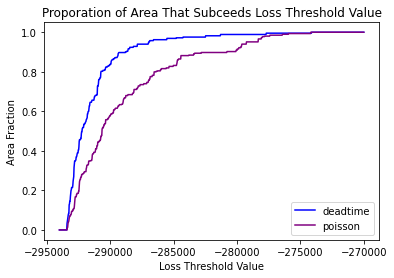

In [27]:
# Plot conditional areas vs loss threshold value

thresh_lst = np.linspace(-27e4, -29.4e4, 1000)
eval_area_dtime_tot = np.zeros(len(thresh_lst))
eval_area_pois_tot = np.zeros(len(thresh_lst))
for i in range(len(thresh_lst)):
    rows_dtime, cols_dtime = np.where(mean_eval_dtime <= thresh_lst[i])
    rows_pois, cols_pois = np.where(mean_eval_pois <= thresh_lst[i])

    accept_dtime = mean_eval_dtime[rows_dtime, cols_dtime]
    accept_pois = mean_eval_pois[rows_pois, cols_pois]
    calc_num_shots = np.append(num_shots, num_shots[-1]*1.5)
    lens_log_num_shots = np.diff(np.log10(calc_num_shots))  # [log10 shots]
    lens_log_t_factor = np.diff(np.log10(transmit_factor[skip_num:-1][::-1]))[0]  # [transmission]

    eval_area_dtime = np.sum(lens_log_num_shots[rows_dtime]*lens_log_t_factor)  # [log10 shots * transmission]
    eval_area_pois = np.sum(lens_log_num_shots[rows_pois]*lens_log_t_factor)  # [log10 shots * transmission]
    
    eval_area_dtime_tot[i] = eval_area_dtime
    eval_area_pois_tot[i] = eval_area_pois
    
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(thresh_lst, eval_area_dtime_tot/tot_area, label='deadtime', color='blue')
ax.plot(thresh_lst, eval_area_pois_tot/tot_area, label='poisson', color='purple')
ax.set_xlabel('Loss Threshold Value')
ax.set_ylabel('Area Fraction')
ax.set_title('Proporation of Area That Subceeds Loss Threshold Value')
plt.legend()
plt.show()